<h1> Load opencv, numpy and plot modules </h1>

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h1>Read sample image</h1>

In [25]:
img = cv2.imread("./lane_detection_1.jpg", 0)

<h1>Plot sample image</h1>

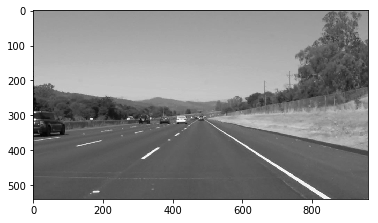

In [26]:
plt.imshow(img, cmap='gray'); plt.show();

<h1>Get image parameters</h1>

In [27]:
img.shape

(540, 960)

<h1>Crop image with region parameters x:200-400, y:100-200</h1>

In [28]:
img_crop = img[300:500, 100:800]; img_crop.shape

(200, 700)

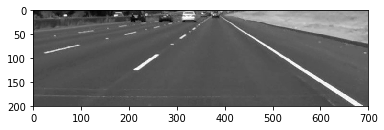

In [29]:
plt.imshow(img_crop, cmap='gray'); plt.show();

<h1> Assignments </h1>

1. Read image file from assignment directory.

In [ ]:
img = cv2.imread("...")